In [1]:
import numpy as np
import pandas as pd
from datetime import date
from random import seed
from random import random

import time
import scipy, scipy.signal
import os, os.path
import shutil
import matplotlib
import matplotlib.pyplot as plt

from pylab import imshow
from matplotlib.image import imread
# vgg16 model used for transfer learning on the dogs and cats dataset
from matplotlib import pyplot
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
import tensorflow as tf
# from keras.optimizers import SGD

from keras.layers import Conv2D
from keras.layers import MaxPooling2D

# from keras.optimizers import gradient_descent_v2
# SGD = gradient_descent_v2.SGD(...)

from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator


import h5py
import sys
sys.path.append('/Users/hn/Documents/00_GitHub/Ag/NASA/Python_codes/')
import NASA_core as nc
# import NASA_plot_core.py as rcp

In [2]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

In [3]:
idx = "EVI"
train_folder = '/Users/hn/Documents/01_research_data/NASA/ML_data/train_images_' + idx + '/'
test_folder = "/Users/hn/Documents/01_research_data/NASA/ML_data/limitCrops_nonExpert_images/"

# Make Prediction

In [4]:
model_dir = "/Users/hn/Documents/01_research_data/NASA/ML_Models/"
model = load_model(model_dir + '01_TL_SingleDouble.h5')

2022-04-24 12:08:17.287765: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


probability of being single cropped is [0.00012851].


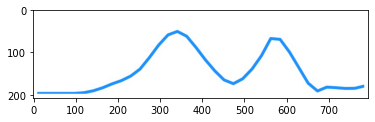

In [5]:
# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(224, 224))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 224, 224, 3)
    # center pixel data
    img = img.astype('float32')
    img = img - [123.68, 116.779, 103.939]
    return img

# # load an image and predict the class
# def run_example():
#     # load the image
#     test_dir = "/Users/hn/Documents/01_research_data/NASA/ML_data/limitCrops_nonExpert_images_" + idx + "/"
#     img = load_image(test_dir+'double_101682_WSDA_SF_2018.jpg')
#     # load model
#     model_dir = "/Users/hn/Documents/01_research_data/NASA/ML_Models/"
#     model = load_model(model_dir + '01_TL_SingleDouble.h5')
#     # predict the class
#     result = model.predict(img)
#     print(result[0])

# entry point, run the example
# run_example()


file_name = 'double_101163_WSDA_SF_2017.jpg'
test_dir = "/Users/hn/Documents/01_research_data/NASA/ML_data/limitCrops_nonExpert_images_" + idx + "/"
img = load_image(test_dir+file_name)
result = model.predict(img)
print ("probability of being single cropped is {}.".format(result[0]))

pyplot.subplot(111)
# define filename
filename = img
image = imread(test_dir+file_name)
pyplot.imshow(image)
pyplot.show()

# Test Phase

In [6]:
test_dir = "/Users/hn/Documents/01_research_data/NASA/ML_data/limitCrops_nonExpert_images_" + idx + "/"

test_filenames = os.listdir(test_dir)
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

test_df["human_predict"] = test_df.filename.str.split("_", expand=True)[0]
test_df["prob_single"]=-1.0
print (test_df.shape)
test_df.head(2)

(1315, 3)


,filename,human_predict,prob_single
0,single_99791_WSDA_SF_2017.jpg,single,-1.0
1,single_6776_WSDA_SF_2016.jpg,single,-1.0


In [7]:
# test_datagen = ImageDataGenerator(featurewise_center=True)
# Image_Size = (224, 224)
# test_generator = test_datagen.flow_from_directory(test_dir,
#                                                   target_size=Image_Size)

In [9]:
# We have done this once before. So, commented out here. and read below.

# for idx in test_df.index:
#     img = load_image(test_dir + test_df.loc[idx, 'filename'])
#     test_df.loc[idx, 'prob_single'] = model.predict(img)[0][0]
    

# for prob in [0.3, 0.4, 0.5, 0.6, 0.7]:
#     colName = "prob_point"+str(prob)[2:]
#     test_df.loc[test_df.prob_single<prob, colName] = 'double'
#     test_df.loc[test_df.prob_single>=prob, colName] = 'single'

# out_dir = "/Users/hn/Documents/01_research_data/NASA/ML_data/01_transfer_learning_result/"
# out_name = out_dir + "01_TL_testSet_predictions_" + idx + ".csv"
# test_df.to_csv(out_name, index = False)

In [ ]:
test_df.loc[40:50]

In [38]:
out_dir = "/Users/hn/Documents/01_research_data/NASA/ML_data/01_transfer_learning_result/"
test_df = pd.read_csv(out_dir + "01_TL_testSet_predictions_" + idx + ".csv")
test_df.head(2)

,filename,human_predict,prob_single,prob_point3,prob_point4,prob_point5,prob_point6,prob_point7
0,single_99791_WSDA_SF_2017.jpg,single,0.924859,single,single,single,single,single
1,single_6776_WSDA_SF_2016.jpg,single,1.000000,single,single,single,single,single


In [39]:
test_df.loc[30:40]

,filename,human_predict,prob_single,prob_point3,prob_point4,prob_point5,prob_point6,prob_point7
30,single_7650_WSDA_SF_2016.jpg,single,0.999953,single,single,single,single,single
31,single_162955_WSDA_SF_2015.jpg,single,0.999995,single,single,single,single,single
32,single_107143_WSDA_SF_2017.jpg,single,0.693614,single,single,single,single,double
33,single_39685_WSDA_SF_2018.jpg,single,1.000000,single,single,single,single,single
34,single_105870_WSDA_SF_2017.jpg,single,0.999999,single,single,single,single,single
35,single_101946_WSDA_SF_2017.jpg,single,0.999991,single,single,single,single,single
36,double_106738_WSDA_SF_2018.jpg,double,1.000000,single,single,single,single,single
37,single_105730_WSDA_SF_2018.jpg,single,0.999987,single,single,single,single,single
38,single_188131_WSDA_SF_2015.jpg,single,1.000000,single,single,single,single,single
39,single_44419_WSDA_SF_2018.jpg,single,0.999954,single,single,single,single,single


In [40]:
# pip show keras
# pip list --outdated
# !pip3 install --upgrade keras

In [41]:
for ii in [3, 4, 5, 6, 7]:
    curr_prob = "prob_point"+str(ii)
    curr_pred_type = "predType_point" + str(ii)
    test_df[curr_pred_type]="a"
    for idx in test_df.index:
        if test_df.loc[idx, "human_predict"]==test_df.loc[idx, curr_prob]=="single":
            test_df.loc[idx, curr_pred_type]="True Single"
        elif test_df.loc[idx, "human_predict"]==test_df.loc[idx, curr_prob]=="double":
            test_df.loc[idx, curr_pred_type]="True Double"
        elif test_df.loc[idx, "human_predict"]=="double" and test_df.loc[idx, curr_prob]=="single":
            test_df.loc[idx, curr_pred_type]="False Single"
        elif test_df.loc[idx, "human_predict"]=="single" and test_df.loc[idx, curr_prob]=="double":
            test_df.loc[idx, curr_pred_type]="False Double"

In [42]:
test_df.head(10)

,filename,human_predict,prob_single,prob_point3,prob_point4,prob_point5,prob_point6,prob_point7,predType_point3,predType_point4,predType_point5,predType_point6,predType_point7
0,single_99791_WSDA_SF_2017.jpg,single,0.924859,single,single,single,single,single,True Single,True Single,True Single,True Single,True Single
1,single_6776_WSDA_SF_2016.jpg,single,1.000000,single,single,single,single,single,True Single,True Single,True Single,True Single,True Single
2,single_111436_WSDA_SF_2017.jpg,single,0.997715,single,single,single,single,single,True Single,True Single,True Single,True Single,True Single
3,single_104812_WSDA_SF_2018.jpg,single,1.000000,single,single,single,single,single,True Single,True Single,True Single,True Single,True Single
4,single_56006_WSDA_SF_2016.jpg,single,1.000000,single,single,single,single,single,True Single,True Single,True Single,True Single,True Single
5,single_158665_WSDA_SF_2015.jpg,single,0.999994,single,single,single,single,single,True Single,True Single,True Single,True Single,True Single
6,single_188250_WSDA_SF_2015.jpg,single,0.999987,single,single,single,single,single,True Single,True Single,True Single,True Single,True Single
7,single_114341_WSDA_SF_2017.jpg,single,1.000000,single,single,single,single,single,True Single,True Single,True Single,True Single,True Single
8,single_104915_WSDA_SF_2018.jpg,single,0.990512,single,single,single,single,single,True Single,True Single,True Single,True Single,True Single
9,single_36196_WSDA_SF_2018.jpg,single,1.000000,single,single,single,single,single,True Single,True Single,True Single,True Single,True Single


In [44]:
needed_cols = ["predType_point3", "predType_point4", 
               "predType_point5", 
               "predType_point6", "predType_point7"]
test_df_trimmed = test_df[needed_cols].copy()
test_df_trimmed.head(2)

,predType_point3,predType_point4,predType_point5,predType_point6,predType_point7
0,True Single,True Single,True Single,True Single,True Single
1,True Single,True Single,True Single,True Single,True Single


In [45]:
TFR=pd.DataFrame()
for col in test_df_trimmed.columns:
    TFR[col]=test_df_trimmed[col].value_counts()
TFR

,predType_point3,predType_point4,predType_point5,predType_point6,predType_point7
True Single,1069,1069,1068,1066,1061
True Double,153,157,161,164,165
False Single,87,83,79,76,75
False Double,6,6,7,9,14


In [46]:
out_name = out_dir + "01_TL_predType_TFR.csv"
# TFR.to_csv(out_name, index = True)

In [47]:
test_df.head(2)

,filename,human_predict,prob_single,prob_point3,prob_point4,prob_point5,prob_point6,prob_point7,predType_point3,predType_point4,predType_point5,predType_point6,predType_point7
0,single_99791_WSDA_SF_2017.jpg,single,0.924859,single,single,single,single,single,True Single,True Single,True Single,True Single,True Single
1,single_6776_WSDA_SF_2016.jpg,single,1.000000,single,single,single,single,single,True Single,True Single,True Single,True Single,True Single


In [48]:
test_df["ID"] = test_df.filename.str.split("_", expand=True)[1]+ "_" + \
                test_df.filename.str.split("_", expand=True)[2]+ "_" + \
                test_df.filename.str.split("_", expand=True)[3]+ "_" + \
                test_df.filename.str.split("_", expand=True)[4].str.split(".", expand=True)[0]

In [49]:
test_df.head(2)

,filename,human_predict,prob_single,prob_point3,prob_point4,prob_point5,prob_point6,prob_point7,predType_point3,predType_point4,predType_point5,predType_point6,predType_point7,ID
0,single_99791_WSDA_SF_2017.jpg,single,0.924859,single,single,single,single,single,True Single,True Single,True Single,True Single,True Single,99791_WSDA_SF_2017
1,single_6776_WSDA_SF_2016.jpg,single,1.000000,single,single,single,single,single,True Single,True Single,True Single,True Single,True Single,6776_WSDA_SF_2016


# Read field info to add areas

In [50]:
eval_set = pd.read_csv("/Users/hn/Documents/01_research_data/NASA/parameters/evaluation_set.csv")
eval_set.head(2)

,ID,CropTyp,Irrigtn,DataSrc,Acres,ExctAcr,LstSrvD,county
0,100010_WSDA_SF_2017,alfalfa hay,center pivot,wsda,34,34.310305,2017/09/12,Grant
1,100204_WSDA_SF_2017,alfalfa hay,center pivot,wsda,62,61.826535,2017/08/09,Grant


In [51]:
test_df = pd.merge(test_df, eval_set, on=['ID'], how='left')
test_df.head(2)

,filename,human_predict,prob_single,prob_point3,prob_point4,prob_point5,prob_point6,prob_point7,predType_point3,predType_point4,...,predType_point6,predType_point7,ID,CropTyp,Irrigtn,DataSrc,Acres,ExctAcr,LstSrvD,county
0,single_99791_WSDA_SF_2017.jpg,single,0.924859,single,single,single,single,single,True Single,True Single,...,True Single,True Single,99791_WSDA_SF_2017,carrot,center pivot,wsda,13,13.275136,2017/09/19,Grant
1,single_6776_WSDA_SF_2016.jpg,single,1.000000,single,single,single,single,single,True Single,True Single,...,True Single,True Single,6776_WSDA_SF_2016,potato,center pivot,wsda,123,122.544403,2016/08/31 00:00:00,Benton


In [79]:
acr_predTypes = pd.DataFrame(columns=['pred_type'])
lst = ['False Single', 'False Double', 'True Double', 'True Single']
acr_predTypes["pred_type"] = lst

for ii in [3, 4, 5, 6, 7]:
    curr_col = "predType_point" + str(ii)
    A = test_df[[curr_col, 'Acres']].groupby([curr_col]).sum()
    A.rename(columns={"Acres": "Acres_point"+ str(ii)}, inplace=True)
    acr_predTypes = pd.merge(acr_predTypes, A.reset_index(), 
                             left_on='pred_type', right_on=curr_col,
                             how='left')
for ii in [3, 4, 5, 6, 7]:
    curr_col = "predType_point" + str(ii)
    acr_predTypes.drop(curr_col, axis="columns", inplace=True)


In [96]:
acr_predTypes

,pred_type,Acres_point3,Acres_point4,Acres_point5,Acres_point6,Acres_point7
0,False Single,4866,4693,4397,4330,4312
1,False Double,375,375,407,493,749
2,True Double,9315,9488,9784,9851,9869
3,True Single,43617,43617,43585,43499,43243


In [97]:
out_dir = "/Users/hn/Documents/01_research_data/NASA/ML_data/01_transfer_learning_result/"
out_name = out_dir + "01_TL_" + idx + "_Acreage_TFPR.csv"
acr_predTypes.to_csv(out_name, index = False)